# Welcome to the YOLO Workshop!

In this workshop, we will learn how to use the YOLO algorithm for object detection

## System Setup

Since we will work with external files, you will need to **link this Google Colab Notebook file to your Google Drive Account**.

This is done with the following piece of code.
If you're using Jupyter Notebook on your computer, you don't need to do this

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/SDC Course/Tracking")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
association_hungarian.ipynb	     KalmanFilter.ipynb  yolo.py
association_hungarian_Starter.ipynb  __pycache__	 yolo_Starter.ipynb
hungarian.ipynb			     Tracking.gslides	 Yolov3
Images				     yolo.ipynb


**ABOUT GPU** <p>

**YOLO** is an object detection algorithm.
Like most of them, it works better on GPU.
GPU will allow parallel computing (instead of sequential). You will not have a vector of operation, but a matrix of operations.<p>
![CPUvsGPU…](https://www.nvidia.fr/docs/IO/144175/cpu-and-gpu.jpg)

Instead of 1 frame per second, you can run at 50 or 60 frames per second.

The version we'll use is developed by OpenCV.
OpenCV has a DNN (Deep Neural Networks) module that includes popular obstacle detection algorithms we saw in course.
We'll use something similar as [this post](https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv/)


*   If you want to work on CPU, skip this section

*   If you want to use GPU, you will need OpenCV > 4.2.0 and compatible CUDA/CUDNN

As of today (March 2020), the preinstalled version of OpenCV and CUDA in Google Colab are unsufficient. We work on very recent libraries.<p>

**I will not cover installation of CUDA/CUDNN in this post. We'll use super-fast CPU.
If you want to use GPU, I recommend you exit Colab and try to run on your own machine or AWS.**


## Import the necessary libraries
We will need OpenCV, Matplotlib, and NumPy

In [0]:
# your code here

## Define the class YOLO and the init() function

In [0]:
class YOLO():
    def __init__(self):
        """
        - YOLO takes an image as input. We should set the dimension of the image to a fixed number.
        - The default choice is often 416x416.
        - YOLO applies thresholding and non maxima suppression, define a value for both
        - Load the classes (.names), model configuration (cfg file) and pretrained weights (weights file) into variables
        - If the image is 416x416, the weights must be corresponding to that image
        - Load the network with OpenCV.dnn function
        """
        # TODO
        self.confThreshold = 
        self.nmsThreshold = 
        self.inpWidth = 
        self.inpHeight = 
        classesFile = 
        self.classes = None
        with open(classesFile,'rt') as f:
            self.classes = f.read().rstrip('\n').split('\n')

        modelConfiguration =
        modelWeights =
        self.net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
        self.net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
        self.net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

In [0]:
def getOutputsNames(self):
    '''
    Get the names of the output layers
    '''
    # Get the names of all the layers in the network
    layersNames = self.net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in self.net.getUnconnectedOutLayers()]

YOLO.getOutputsNames = getOutputsNames

In [0]:
def drawPred(self, frame, classId, conf, left, top, right, bottom):
    '''
    Draw a bounding box around a detected object given the box coordinates
    Later, we could repurpose that to display an ID
    '''
    # Draw a bounding box.
    # your code here
    
    # Get the label for the class name and its confidence
    # your code here
    
    #Display the label at the top of the bounding box
    # your code here
    return frame
    
YOLO.drawPred = drawPred

In [0]:
def postprocess(self,frame, outs):
    """
    Postprocessing step. Take the output out of the neural network and interpret it.
    We should use that output to apply NMS thresholding and confidence thresholding
    We should use the output to draw the bounding boxes using the dramPred function
    """
    frameHeight = 
    frameWidth = 
    classIds = []
    confidences = []
    boxes = []
    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    # your code here

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    # your code here
    
    # Draw the bounding bxoes on the image
    # your code here
    return output_image

YOLO.postprocess = postprocess

In [0]:
def inference(self,image):
    """
    Main loop.
    Input: Image
    Output: Frame with the drawn bounding boxes
    """
    # Create a 4D blob from a frame.
    # Sets the input to the network
    # Runs the forward pass to get output of the output layers
    # Remove the bounding boxes with low confidence
    return final_frame

YOLO.inference = inference

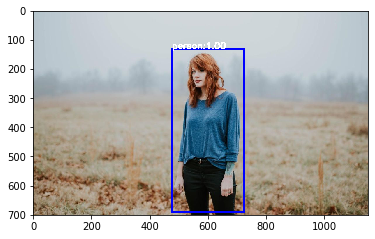

In [0]:
img = mpimg.imread("/content/drive/My Drive/SDC Course/Tracking/Images/person.jpg")
yolo = YOLO()
oi = yolo.inference(img)
plt.imshow(oi)
plt.show()

### Detection on a video!

A video is just a set of frames, we will call the inference function for each frame of the video and save it.


In [0]:
os.chdir("/content/drive/My Drive/SDC Course/Tracking/Images")
!ls

canny.jpg	  image_14.jpg	image_49.jpg  output_color_2.jpeg
dog.jpg		  image_21.jpg	image_56.jpg  output_color.jpeg
far.jpeg	  image_28.jpg	image_7.jpg   people.jpg
france_road.jpeg  image_35.jpg	IMG_8248.MOV  person.jpg
image_0.jpg	  image_42.jpg	movie.mp4     photo.jpg


In [0]:
from moviepy.editor import VideoFileClip
video_file = "/content/drive/My Drive/SDC Course/Tracking/Images/IMG_8248.MOV"
clip = VideoFileClip(video_file).subclip(0,1)
white_clip = clip.fl_image(yolo.inference)
%time white_clip.write_videofile("movie.mp4",audio=False)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1474560/45929032 bytes (3.2%)4218880/45929032 bytes (9.2%)7634944/45929032 bytes (16.6%)11034624/45929032 bytes (24.0%)14450688/45929032 bytes (31.5%)17932288/45929032 bytes (39.0%)21331968/45929032 bytes (46.4%)24633344/45929032 bytes (53.6%)28065792/45929032 bytes (61.1%)31580160/45929032 bytes (68.8%)35061760/45929032 bytes (76.3%)38436864/45929032 bytes (83.7%)4

 98%|█████████▊| 60/61 [02:37<00:03,  3.32s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: movie.mp4 

CPU times: user 4min 23s, sys: 1.36 s, total: 4min 24s
Wall time: 3min 11s


In [0]:
import io
import base64
from IPython.display import HTML

video = io.open('movie.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls width="320" height="240">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))) 